In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penugasan-oprec-dsai-2024/sample_submission.csv
/kaggle/input/penugasan-oprec-dsai-2024/Train.csv
/kaggle/input/penugasan-oprec-dsai-2024/Test.csv


# EDA

In [2]:
df = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Train.csv')
dfplot = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Train.csv')
data = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Test.csv')

### Membuat dataframe untuk training set dan testing set. Dataframe **df** untuk train, **data** untuk test, dan **dflpot** yang berisi training set yang digunakan untuk membuat correlation map. ☝️🤓

In [3]:
id = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Test.csv')

### untuk mendapatkan kolom 'id' nanti saat membuat file submission ☝️🤓

In [4]:
df

,id,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,0,2024.0,NaN,FT,Data Engineer,USD,US,0.0,US,M,138000
1,1,2024.0,SE,FT,Software Engineer,USD,US,2.0,NaN,M,180000
2,2,2024.0,NaN,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,3,2024.0,NaN,NaN,Data Engineer,USD,US,0.0,US,M,180000
4,4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,NaN,204000
...,...,...,...,...,...,...,...,...,...,...,...
35073,49995,2024.0,SE,NaN,Data Analyst,USD,AU,NaN,NaN,M,88333
35074,49996,NaN,MI,NaN,Business Intelligence,USD,US,NaN,US,M,252291
35075,49997,2024.0,NaN,FT,Product Manager,USD,US,0.0,US,NaN,196010
35076,49998,NaN,MI,FT,Data Architect,USD,PT,0.0,PT,M,50316


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35078 non-null  int64  
 1   work_year           28062 non-null  float64
 2   experience_level    28062 non-null  object 
 3   employment_type     28062 non-null  object 
 4   job_title           35078 non-null  object 
 5   salary_currency     35078 non-null  object 
 6   employee_residence  28062 non-null  object 
 7   remote_ratio        28062 non-null  float64
 8   company_location    28062 non-null  object 
 9   company_size        28062 non-null  object 
 10  salary              35078 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.9+ MB


## data distribution

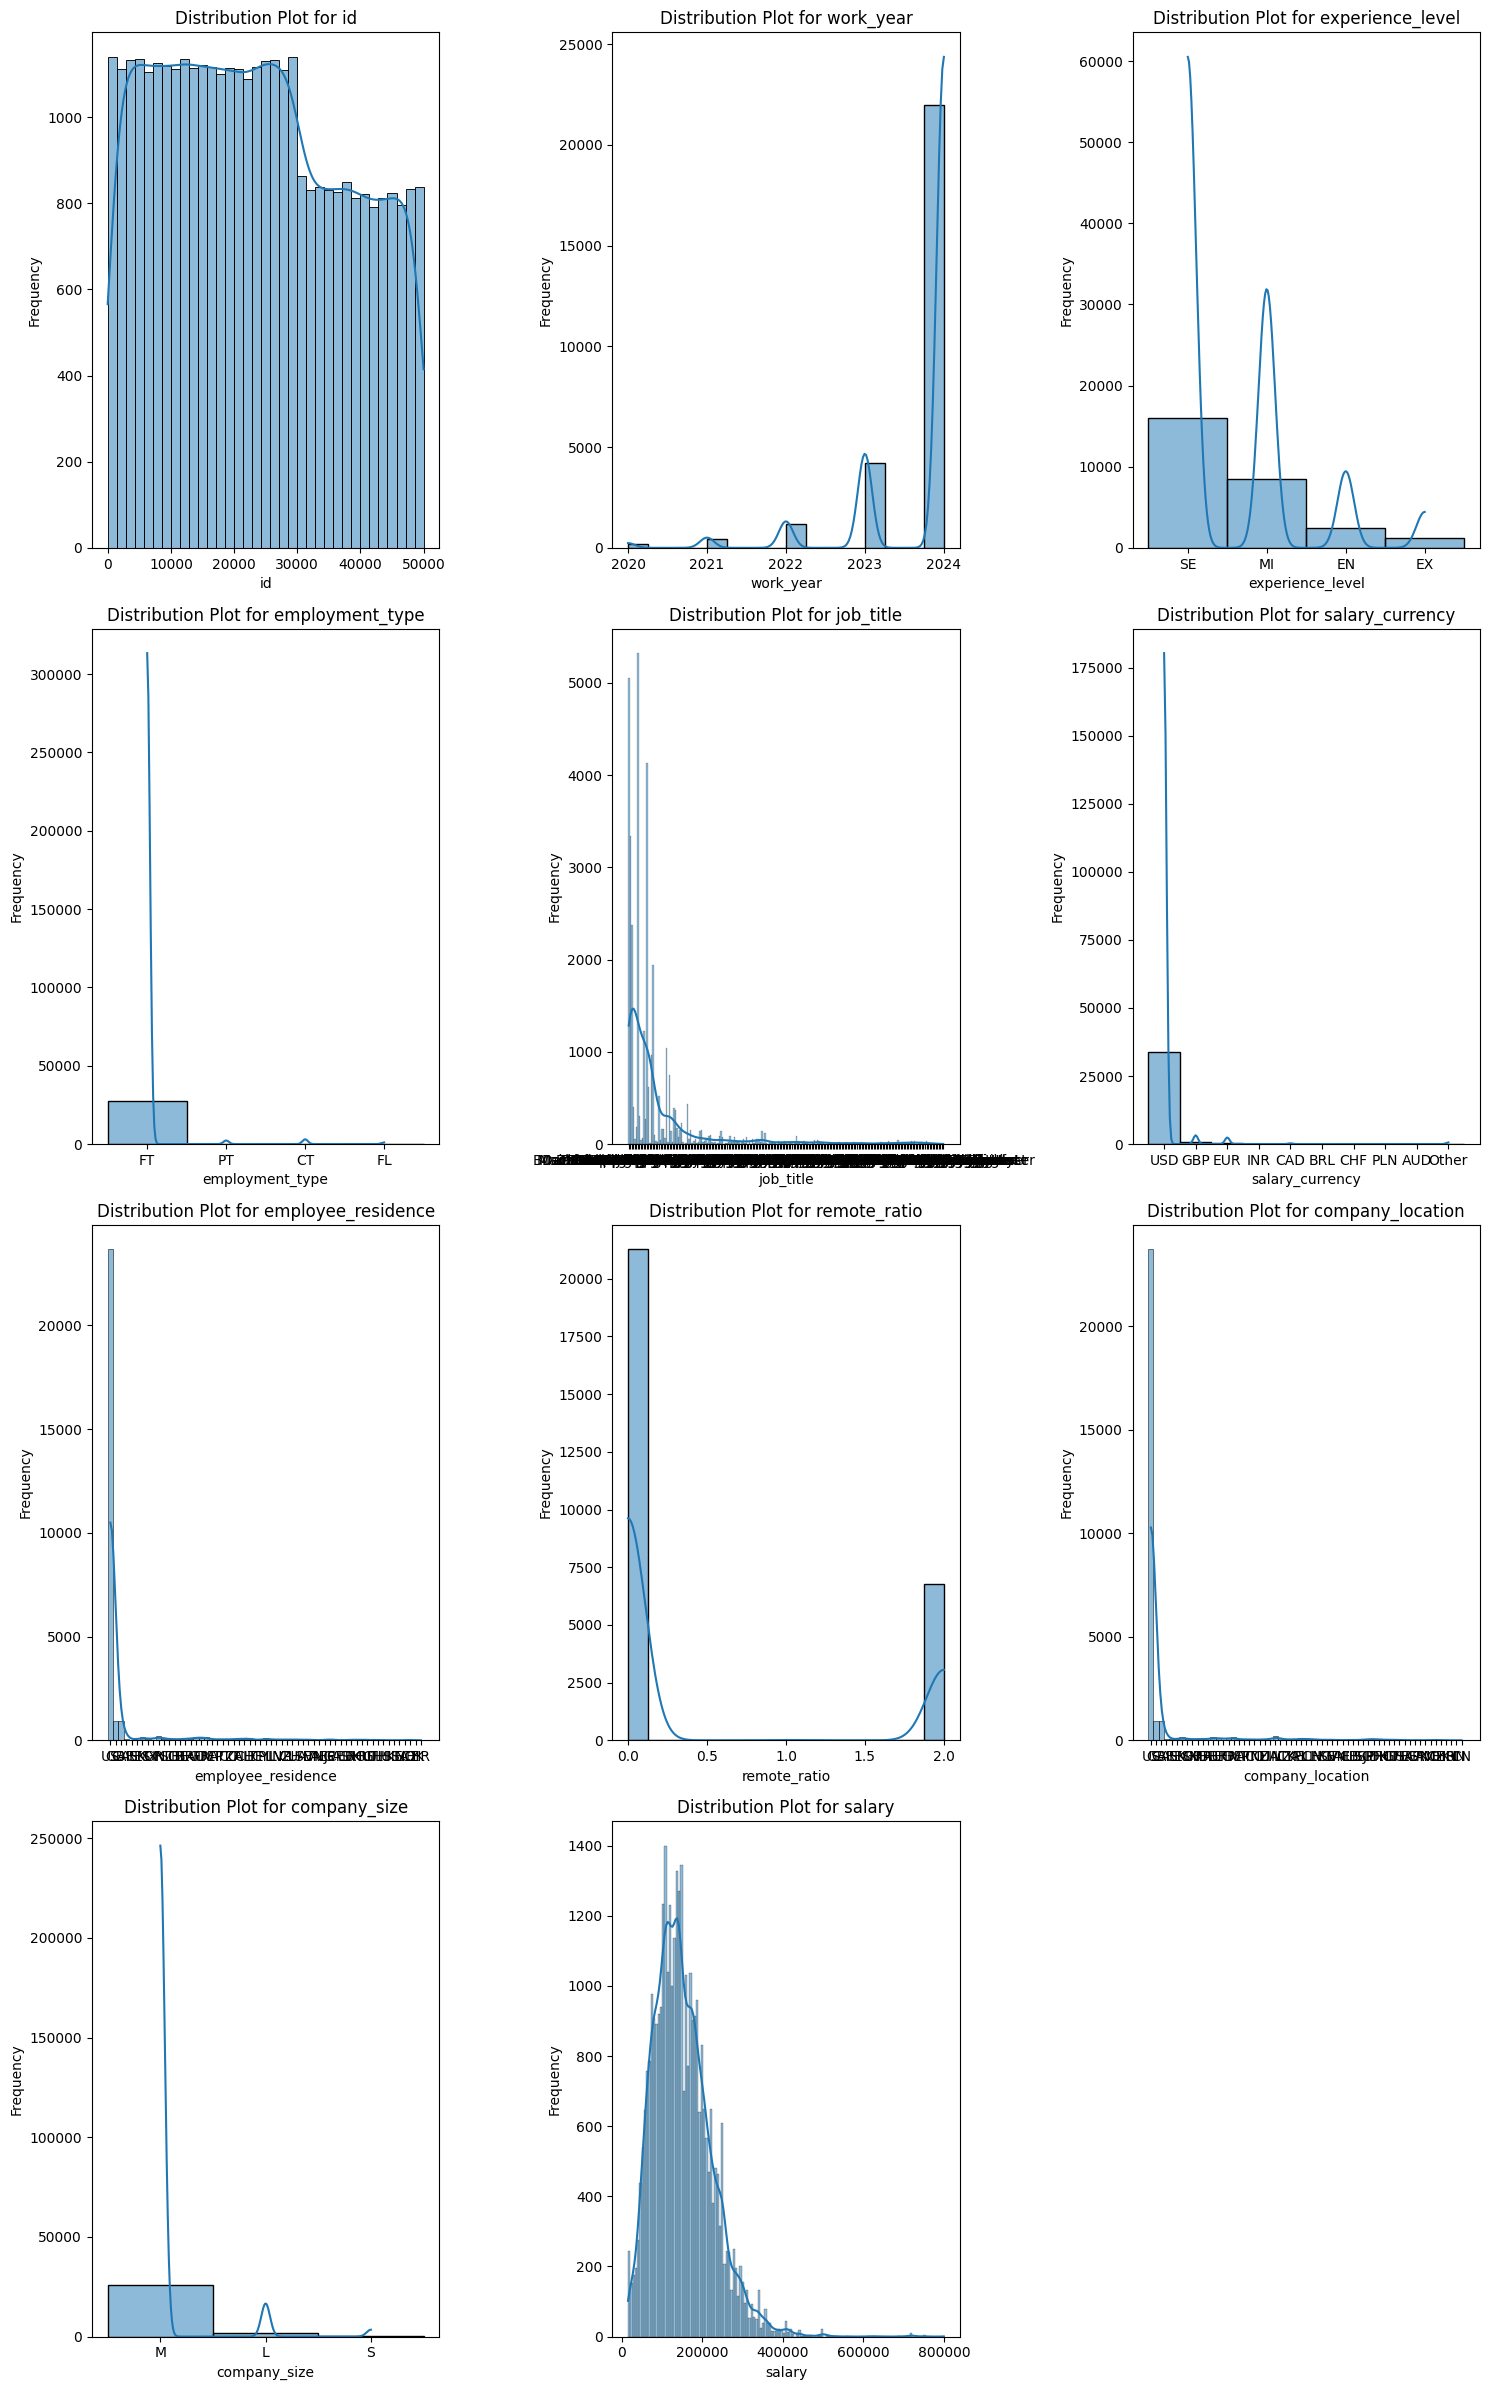

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3  
n_rows = (len(df.columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Dari grafik di atas terlihat bahwa kebanyakan data merupakan data kategorikal, dengan fitur **'salary'** sebagai satu-satunya data kuantitatif. Terdapat exception untuk fitur **'experience_level'** yang merupakan data kategorikal ordinal. ☝️🤓

## Data correlation

In [7]:
from sklearn.preprocessing import LabelEncoder

Lbl = LabelEncoder()

categorical_columns = [column for column in dfplot.columns if dfplot[column].dtype == "O"]
mapping_dict = {}

for column in categorical_columns:
    dfplot[column] = Lbl.fit_transform(dfplot[column])
    
    unique_values = list(Lbl.classes_)
    transformed_values = list(range(len(unique_values)))
    mapping_dict[column] = dict(zip(transformed_values, unique_values))

### dataframe dfplot di*encode* menggunakan label encoding agar dapat dibaca oleh heatmap. Alasan digunakannya dataframe independen untuk membuat heatmap adalah agar kita masih memiliki dataframe asli yang belum di*encode* sehingga kita dapat menyesuaikan *encoding* sesuai **Exploratory Data Analisys**.

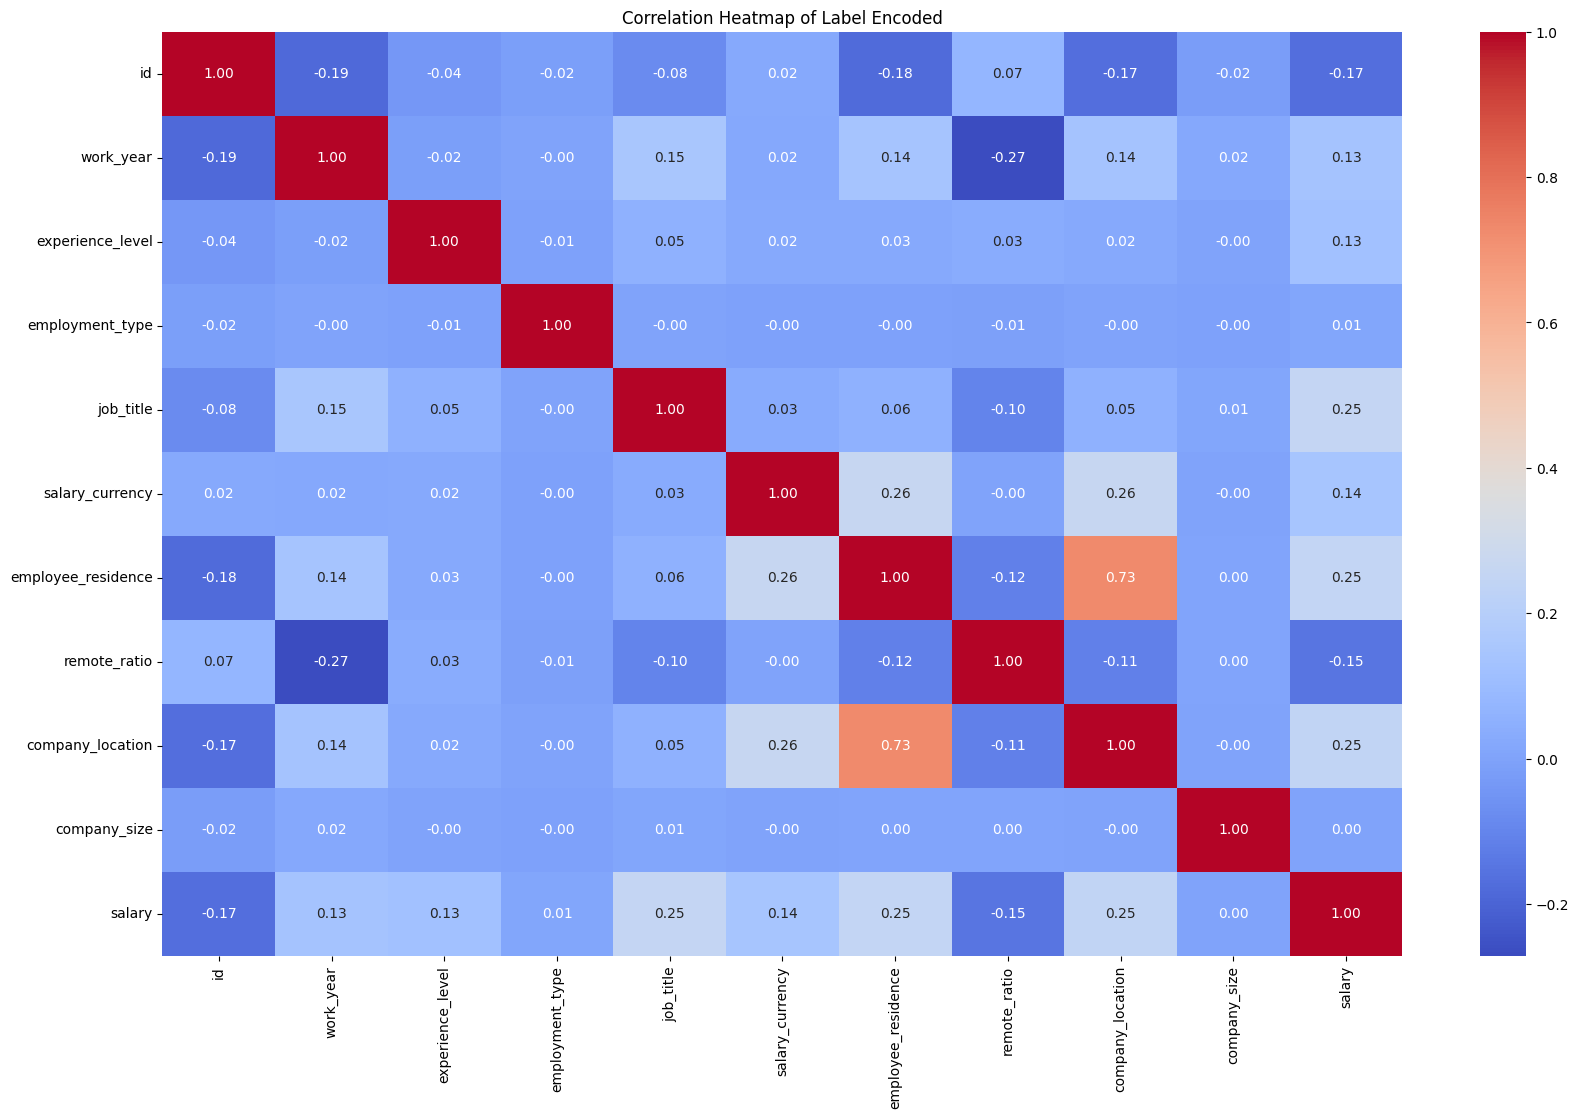

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.heatmap(dfplot.corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Label Encoded")
plt.show()

In [9]:
print("Unique values in employee_residence:", df['employee_residence'].unique())
print("Unique values in company_location:", df['company_location'].unique())

Unique values in employee_residence: ['US' 'GB' nan 'CA' 'AR' 'IE' 'SK' 'ES' 'MX' 'GR' 'IN' 'NL' 'SG' 'TR' 'BE'
 'BR' 'EG' 'AU' 'FR' 'DE' 'MT' 'AT' 'PT' 'CO' 'ZA' 'FI' 'CH' 'LT' 'EE'
 'CY' 'PL' 'IL' 'LV' 'NZ' 'CL' 'PH' 'UA' 'SE' 'IT' 'VN' 'AE' 'NG' 'JP'
 'CF' 'AS' 'LB' 'DK' 'RO' 'HU' 'RU' 'GH' 'TH' 'LU' 'SI' 'KE' 'SA' 'NO'
 'CZ' 'HK' 'HR']
Unique values in company_location: ['US' nan 'GB' 'CA' 'AR' 'IE' 'SK' 'ES' 'MX' 'GR' 'NL' 'TR' 'BE' 'AU' 'BR'
 'EG' 'FR' 'DE' 'MT' 'AT' 'PT' 'CO' 'NZ' 'FI' 'UA' 'IN' 'LT' 'CY' 'ZA'
 'KE' 'PL' 'IL' 'CH' 'LV' 'NG' 'SE' 'IT' 'VN' 'AE' 'CL' 'LB' 'BS' 'SG'
 'JP' 'PH' 'DK' 'RU' 'HU' 'GH' 'TH' 'SA' 'EE' 'CF' 'PK' 'AM' 'NO' 'CZ'
 'HK' 'HR' 'SI' 'HN' 'CN']


### Dari correlation matrix di atas terlihat bahwa fitur **company_location** dan **employee_residence** memiliki correlation yang kuat. Artinya ada value dalam fitur **company_location** yang berhubungan erat dengan value dalam fitur **employee_location**. High correlating features biasanya dapat menambah noise sehingga sebaiknya salah satu fitur di drop. Namun hasil prediksi terbaik didapatkan saat menggunakan kedua fitur ini. Juga melihat banyaknya unique values dari kedua fitur ini, encoding menggunakan one-hot encoder hanya akan menambah noise. 

## Outlier data in target feature 

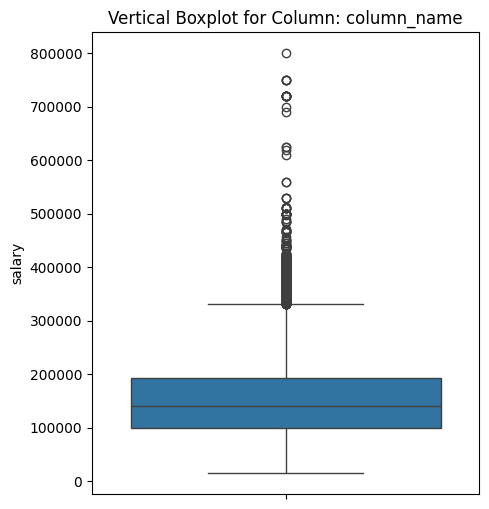

In [10]:
# Create a vertical boxplot for a single column (replace 'column_name' with your column name)
plt.figure(figsize=(5, 6))
sns.boxplot(y=df['salary'])

# Display the plot
plt.title('Vertical Boxplot for Column: column_name')
plt.show()

### Karena **'salary'** merupakan satu-satunya fitur kuantitatif, maka kita hanya akan melihat box plot untuk melihat outlier pada fitur **'salary'**.
### Kita menggunakan range IQR untuk menentukan outlier karena distribusi **'salary'** *skewed*. Terlihat bahwa ada beberapa data yang berada di luar range IQR. 

## Null Data and Duplicate

In [11]:
df.isnull().sum()

id                       0
work_year             7016
experience_level      7016
employment_type       7016
job_title                0
salary_currency          0
employee_residence    7016
remote_ratio          7016
company_location      7016
company_size          7016
salary                   0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Data Preprocessing



## Dropping redundant features

In [13]:
df = df.drop('id', axis=1)
data = data.drop('id', axis=1)

## Dropping outliers

In [14]:

original_indices = df.index

# Initialize an empty set to store indices of outliers
outlier_indices = set()

# Loop through each numeric column and identify outliers based on the IQR method

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Identify the indices of outliers
column_outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)].index
outlier_indices.update(column_outliers)

# Convert the set of outlier indices to a list
outlier_indices = list(outlier_indices)

# Drop the outliers from X_train and y_train
df = df.drop(outlier_indices)
print("Indices of dropped outliers:", outlier_indices)


Indices of dropped outliers: [16387, 12297, 16395, 10252, 12302, 14350, 18448, 6162, 20499, 20, 2068, 22553, 10267, 14364, 30747, 24614, 4136, 18472, 2092, 16428, 53, 20535, 30777, 6203, 14396, 20542, 6207, 18501, 12358, 8265, 10313, 20554, 24651, 77, 18518, 14424, 14426, 8283, 22620, 18526, 30814, 10340, 18535, 8297, 20591, 8304, 32881, 2164, 34932, 32887, 14459, 18557, 8322, 28802, 28803, 10373, 22662, 4233, 12427, 12431, 150, 151, 10395, 32924, 14498, 10404, 170, 2219, 12458, 34986, 30895, 28848, 4275, 20663, 4282, 2237, 16576, 35014, 28876, 2255, 6353, 22741, 14552, 14553, 8411, 16607, 22757, 32998, 12519, 232, 12520, 4330, 20711, 10477, 33007, 8432, 2299, 2300, 20732, 33022, 10498, 2308, 18693, 22788, 18696, 18698, 16651, 22794, 6413, 8463, 10515, 6424, 26909, 20775, 16684, 22829, 8495, 31023, 16692, 8504, 18748, 26944, 14658, 6469, 10569, 10571, 29003, 10579, 22867, 26965, 12637, 4446, 14687, 33120, 22887, 4458, 8555, 2416, 369, 10611, 372, 20855, 6524, 12668, 20861, 27005, 31100

### These are the index of all the data that's outside of the IQR range and has been dropped

In [15]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,2024.0,NaN,FT,Data Engineer,USD,US,0.0,US,M,138000
1,2024.0,SE,FT,Software Engineer,USD,US,2.0,NaN,M,180000
2,2024.0,NaN,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,2024.0,NaN,NaN,Data Engineer,USD,US,0.0,US,M,180000
4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,NaN,204000
...,...,...,...,...,...,...,...,...,...,...
35073,2024.0,SE,NaN,Data Analyst,USD,AU,NaN,NaN,M,88333
35074,NaN,MI,NaN,Business Intelligence,USD,US,NaN,US,M,252291
35075,2024.0,NaN,FT,Product Manager,USD,US,0.0,US,NaN,196010
35076,NaN,MI,FT,Data Architect,USD,PT,0.0,PT,M,50316


### The dataframe went from 3500 rows to 34390 rows which is not that significant of a change

## Filling in null data

In [16]:
columns_to_filter = ['employment_type', 'remote_ratio', 'company_size', 
                     'company_location', 'experience_level', 'work_year','employee_residence']
for col in columns_to_filter:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

### filling in null data with mode for categorical columns 

In [17]:
df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary                0
dtype: int64

### All null values has been filled ☝️🤓

## Encoding the data

### encoding **'work_year'** with OneHot encoding because it's purely categorical and it has vew unique values

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Inisiasi OneHotEncoder
OH = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False untuk mendapat dataframe

# Fit and transform data training
train_encoded = OH.fit_transform(df[['work_year']])

# Transform data val dengan encoder yang sudah fit dengan data training
test_encoded = OH.transform(data[['work_year']])

# Konversi hasil menjadi data frame dengan nama yang sesuai
train_encoded = pd.DataFrame(train_encoded, columns=OH.get_feature_names_out(['work_year']), index=df.index)
test_encoded = pd.DataFrame(test_encoded, columns=OH.get_feature_names_out(['work_year']), index=data.index)

# Gabungkan data ter-encode dengan dataframe awal
df_encoded = pd.concat([df, train_encoded], axis=1)
data_encoded = pd.concat([data, test_encoded], axis=1)

df_encoded = df_encoded.drop('work_year', axis=1)
data_encoded = data_encoded.drop('work_year', axis=1)

In [19]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,2024.0,SE,FT,Data Engineer,USD,US,0.0,US,M,138000
1,2024.0,SE,FT,Software Engineer,USD,US,2.0,US,M,180000
2,2024.0,SE,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,2024.0,SE,FT,Data Engineer,USD,US,0.0,US,M,180000
4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,M,204000
...,...,...,...,...,...,...,...,...,...,...
35073,2024.0,SE,FT,Data Analyst,USD,AU,0.0,US,M,88333
35074,2024.0,MI,FT,Business Intelligence,USD,US,0.0,US,M,252291
35075,2024.0,SE,FT,Product Manager,USD,US,0.0,US,M,196010
35076,2024.0,MI,FT,Data Architect,USD,PT,0.0,PT,M,50316


### Encode all the other features with LabelEncoder to convert string to numbers

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['experience_level','employment_type', 'job_title', 
                    'salary_currency', 'remote_ratio', 'company_location', 'company_size', 'employee_residence']  # Add your own categorical columns here

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])
    data_encoded[col] = label_encoder.transform(data[col])

In [21]:
df_encoded


,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary,work_year_2020.0,work_year_2021.0,work_year_2022.0,work_year_2023.0,work_year_2024.0
0,3,2,70,9,56,0,58,1,138000,0.0,0.0,0.0,0.0,1.0
1,3,2,197,9,56,2,58,1,180000,0.0,0.0,0.0,0.0,1.0
2,3,2,145,9,56,0,58,1,118500,0.0,0.0,0.0,0.0,1.0
3,3,2,70,9,56,0,58,1,180000,0.0,0.0,0.0,0.0,1.0
4,3,2,177,9,56,0,58,1,204000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35073,3,2,59,9,4,0,58,1,88333,0.0,0.0,0.0,0.0,1.0
35074,2,2,41,9,56,0,58,1,252291,0.0,0.0,0.0,0.0,1.0
35075,3,2,177,9,56,0,58,1,196010,0.0,0.0,0.0,0.0,1.0
35076,2,2,67,9,45,0,48,1,50316,0.0,0.0,0.0,0.0,1.0


In [22]:
data_encoded

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,work_year_2020.0,work_year_2021.0,work_year_2022.0,work_year_2023.0,work_year_2024.0
0,3,0,123,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
1,2,2,70,9,56,0,58,1,0.0,0.0,0.0,1.0,0.0
2,3,2,123,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
3,3,2,197,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
4,2,2,197,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,2,2,145,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
8766,0,2,188,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0
8767,3,2,145,9,56,0,58,1,0.0,0.0,0.0,1.0,0.0
8768,2,2,197,9,56,0,58,1,0.0,0.0,0.0,0.0,1.0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_encoded.drop(columns='salary')
y = df_encoded['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (27512, 13) (27512,)
Testing set shape: (6878, 13) (6878,)


### Splitting the train data first (to avoid data leakage), then further encode the features that has no ordinal value with target encoding.

In [24]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.0 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
from category_encoders import TargetEncoder
import pandas as pd

# Define the columns to target encode and the target column
categorical_columns = ['employment_type', 'job_title', 'salary_currency', 
                   'employee_residence', 'remote_ratio', 'company_location', 
                   'company_size']


target_encoder = TargetEncoder(cols=categorical_columns)

# Fit the encoder on the training set
X_train = target_encoder.fit_transform(X_train, y_train)

# Transform the test set using the same encoder
X_test = target_encoder.transform(X_test)

data_encoded = target_encoder.transform(data_encoded)


### Target encoding converts high cardinal data while retaining value importance by linking it to the average of the target value

In [26]:
X_train

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,work_year_2020.0,work_year_2021.0,work_year_2022.0,work_year_2023.0,work_year_2024.0
26606,3,146976.638597,176339.796154,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
15393,3,146976.638597,176339.796154,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
7930,0,146976.638597,183345.268387,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
18106,2,146976.638597,149476.129987,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
9031,3,146976.638597,132957.661319,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17240,1,146976.638597,150760.728178,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
6423,3,146976.638597,132957.661319,148090.574366,154053.418345,129840.024331,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
11540,3,146976.638597,132957.661319,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,1.0,0.0,0.0
882,3,146976.638597,150760.728178,148090.574366,154053.418345,129840.024331,154057.048153,146363.885945,0.0,0.0,0.0,1.0,0.0


In [27]:
X_test

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,work_year_2020.0,work_year_2021.0,work_year_2022.0,work_year_2023.0,work_year_2024.0
29337,3,146976.638597,150760.728178,148090.574366,123252.733580,129840.024331,120446.101868,146363.885945,0.0,1.0,0.0,0.0,0.0
21736,2,146976.638597,150760.728178,76638.159140,102353.410456,150084.740607,98901.142868,146363.885945,0.0,0.0,0.0,0.0,1.0
27413,3,146976.638597,104949.680425,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
27423,0,146976.638597,93658.987151,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
5441,2,146976.638597,214452.471487,148090.574366,154053.418345,129840.024331,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,3,146976.638597,152754.858072,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
30370,3,146976.638597,132957.661319,148090.574366,154053.418345,129840.024331,154057.048153,141812.878990,0.0,0.0,0.0,0.0,1.0
26966,3,146976.638597,186096.487137,148090.574366,100138.728880,129840.024331,101423.283363,146363.885945,0.0,0.0,0.0,1.0,0.0
33847,3,146976.638597,156965.085509,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0


In [28]:
data_encoded

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,work_year_2020.0,work_year_2021.0,work_year_2022.0,work_year_2023.0,work_year_2024.0
0,3,110500.719523,156965.085509,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
1,2,146976.638597,132957.661319,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,1.0,0.0
2,3,146976.638597,156965.085509,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
3,3,146976.638597,176339.796154,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
4,2,146976.638597,176339.796154,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,2,146976.638597,186096.487137,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
8766,0,146976.638597,168569.206417,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0
8767,3,146976.638597,186096.487137,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,1.0,0.0
8768,2,146976.638597,176339.796154,148090.574366,154053.418345,150084.740607,154057.048153,146363.885945,0.0,0.0,0.0,0.0,1.0


# Modelling

### The model im using uses 4 types of models, 3 decision tree based models and a stacking regressor. Hyperparameter tuning is applied to each tree based models and cross validated using k-fold. Then Stacking regressors combines all three models. This method of machine learning gives the best result so far.

## tuning randomforest model with optuna

In [29]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 30.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [30]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': None,
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        # Use max_samples only if bootstrap=True
        'max_samples': trial.suggest_float('max_samples', 0.5, 1.0) if trial.suggest_categorical('bootstrap', [True, False]) else None,
    }
    rf = RandomForestRegressor(**param, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = (-scores.mean()) ** 0.5
    return rmse

# Create Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Train the best model
rfmodel = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
rfmodel.fit(X_train, y_train)

# Output best parameters and RMSE
print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)

# Evaluate the model on the test set
y_pred1 = rfmodel.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred1, squared=False)
print("Test RMSE:", test_rmse)


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-17 08:44:13,947] A new study created in memory with name: no-name-81485c33-0f1e-4b17-a5c4-f93b2dcc6772
[I 2024-11-17 08:44:20,021] Trial 0 finished with value: 53879.12161661986 and parameters: {'n_estimators': 489, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 7, 'bootstrap': True, 'max_samples': 0.7034151427464027}. Best is trial 0 with value: 53879.12161661986.
[I 2024-11-17 08:44:22,992] Trial 1 finished with value: 54131.799422253396 and parameters: {'n_estimators': 327, 'max_depth': 41, 'min_samples_split': 30, 'min_samples_leaf': 14, 'bootstrap': False}. Best is trial 0 with value: 53879.12161661986.
[I 2024-11-17 08:44:30,561] Trial 2 finished with value: 55207.995650168814 and parameters: {'n_estimators': 961, '

Best parameters: {'n_estimators': 798, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 3, 'bootstrap': True, 'max_samples': 0.502805894996589}
Best RMSE: 53635.59643468914
Test RMSE: 52206.647683769406


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## tuning XGBRegressor model using random search

In [31]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


# Step 2: Define the model and parameter grid
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1, 10],
}

# Step 3: Set up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Configure Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter settings to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=kfold,
    verbose=1,  # Display progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Step 5: Fit the model
random_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

xgbmodel = random_search.best_estimator_
y_pred = xgbmodel.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best Score (RMSE): 53467.722445528154
Test RMSE: 52079.293752564554


## tuning catboost model using random search

In [34]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 28.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [35]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error



catboost = CatBoostRegressor(silent=True, random_state=42)

# 3. Define the parameter grid
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1],
    'iterations': [500, 1000],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 0.5, 1]
}

# 4. Define K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Perform Grid Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=CatBoostRegressor(verbose=0), 
    param_distributions=param_grid, 
    n_iter=10,  # Limit to fewer iterations
    cv=kfold, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# 7. Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", (-random_search.best_score_) ** 0.5)

# 8. Train the final model with best parameters
catboostmodel = random_search.best_estimator_
catboostmodel.fit(X_train, y_train)

# 9. Evaluate on the test set
y_pred3 = catboostmodel.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred3, squared=False)
print("Test RMSE:", test_rmse)

Best Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 10, 'bagging_temperature': 1}
Best RMSE: 53601.38613997286
Test RMSE: 52346.73797068854


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## combining all 3 models 

In [41]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import numpy as np

base_learners = [
    ('randomforest',
     rfmodel), 
     #RandomForestRegressor(
        #n_estimators=312, 
        #max_depth=13, 
        #min_samples_split=30, 
        #min_samples_leaf=5, 
        #max_features=1.0, 
        #bootstrap=True,
        #max_samples= 1.0)),
    ('xgb', 
     xgbmodel),
     #XGBRegressor(
        #n_estimators=700,
        #max_depth=6, 
        #learning_rate=0.014496640737649786, 
        #subsample=0.7312243730027264, 
        #colsample_bytree=0.5974953855135107,
        #gamma= 9.726321743274604e-05, 
        #reg_alpha= 0.11608957111768828, 
        #reg_lambda= 1.4715127951380816e-05, 
        #min_child_weight= 7)),
    ('catboost', 
     catboostmodel)
     #CatBoostRegressor(
        #iterations=1869, 
        #depth=5, 
        #learning_rate=0.04756234046854846, 
        #l2_leaf_reg=4.251614765759464, 
        #subsample=0.9775979472829763, 
        #colsample_bylevel=0.8885004894907986,
        #bagging_temperature= 0.7779026330486895, 
        #random_strength= 6.5890935514739315, 
        #min_data_in_leaf= 8, 
        #border_count= 234))
     
    ]

# Initialize the Stacking model with a Ridge meta-learner
best_model = StackingRegressor(estimators=base_learners, final_estimator=Ridge(alpha=1.0))

# Fit the model
best_model = best_model.fit(X_train, y_train)

# Make predictions
pred = best_model.predict(X_test)

# Calculate performance metrics
r3 = r2_score(y_test, pred)
mae3 = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'R2 : {r3}')
print(f'(MAE): {mae3}')
print(f'(MSE): {mse}')
print(f'(RMSE): {rmse}')


/usr/local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:23:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

R2 : 0.3238317915741511
(MAE): 41206.40978655393
(MSE): 2710341227.743891
(RMSE): 52060.93763796317


### the combination of the different methods used for tuning gave the best results.

# Submission

In [42]:
# Preprocessing of test data, fit model
preds_test = best_model.predict(data_encoded)
# Save Prediction into a csv file
output = pd.DataFrame({'id': id['id'],
                       'salary': preds_test})
output.to_csv('submission23.csv', index=False)
print("Succesfully saved csv")

Succesfully saved csv
